## TASK-2 Prediction using Unsupervised ML

### Problem Statement:

    From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Author: Aakash Shyam Pal

In [1]:
# Importing the libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
# Load the iris dataset

iris = datasets.load_iris()
dataset = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
# Displaying dataset

dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# Shape of dataset

dataset.shape

(150, 4)

    --> The shape of the dataset is 150, 4.

In [5]:
# Top 5 records of dataset.

dataset.head()  

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# Last 5 records of dataset.

dataset.tail()  

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [7]:
# Datatype of each feature.

dataset.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [8]:
# Missing values.

dataset.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

    ---> No Missing Values.

In [9]:
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


    --> Their is no missing value in the dataset.
    --> Minimum sepal length in cm is 4.30 whereas Maximum sepal length in cm is 7.90.
    --> Minimum sepal width in cm is 2.00 whereas Maximum sepal width in cm is 4.40.
    --> Minimum petal length in cm is 1.00 whereas Maximum petal length in cm is 6.90.
    --> Minimum petal width in cm is 0.10 whereas Maximum petal width in cm is 2.50.        

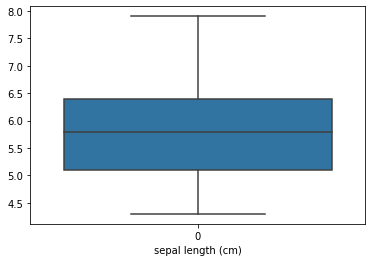

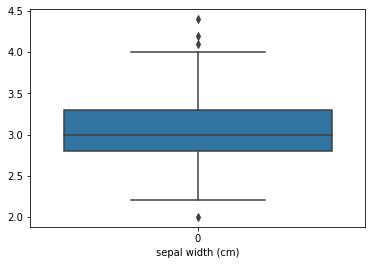

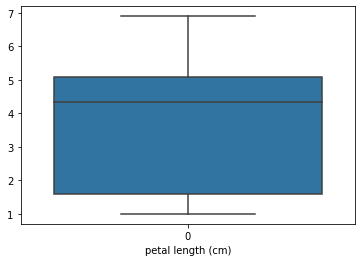

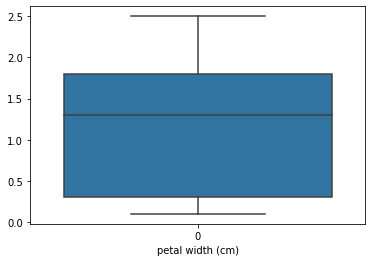

In [10]:
# Outliers

for i in dataset.columns:
    sns.boxplot(dataset[i])
    plt.xlabel(i)
    plt.show()

    --> Their are some outlier in the sepal width column.

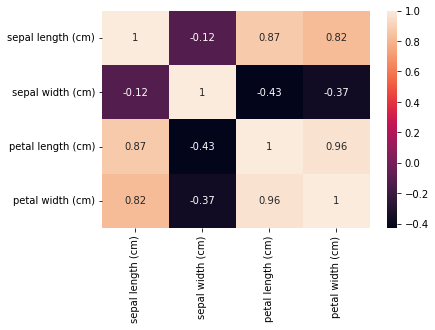

In [11]:
# correlation

sns.heatmap(dataset.corr(),annot=True)
plt.show()

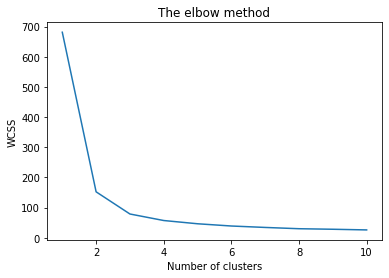

In [12]:
# Finding the optimum number of clusters for k-means classification

x = dataset.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = [] # Within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

    --> From the above graph, the optimum clusters is where the elbow occurs.From this we choose the number of clusters as 3.

In [13]:
# Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

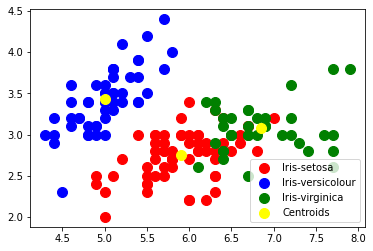

In [14]:
# Visualising the clusters - On the first two columns

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()